## DGE testing using diffxpy: for all coarse-grained cell types PF vs. healthy

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import sparse

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3               
sc.logging.print_version_and_date()
sc.logging.print_header()

# making sure plots & clusters are reproducible
np.random.seed(42)

# custom functions
import sc_toolbox as sct
import re

# import diffxpy for DE testing
import diffxpy.api as de
import warnings
warnings.filterwarnings("ignore")

Running Scanpy 1.8.1, on 2022-02-08 15:27.


/home/niklas/miniconda3/envs/niche_fibrosis_env_diffxpy/lib/python3.8/site-packages/numba/core/cpu.py:97: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  numba.core.entrypoints.init_all()
2022-02-08 15:27:57.106572: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-08 15:27:57.106597: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.19.5 scipy==1.7.1 pandas==1.3.3 scikit-learn==1.0.1 statsmodels==0.12.2 pynndescent==0.5.4


In [2]:
## path variables
adata_dir = '/home/niklas/data/210514_IPF_atlas_human/210611_in_vivo_reference_NIKLAS.h5ad'
results_dir = '/home/niklas/projects/niche_environments_FIBROSIS/IPF_cell_atlas_reference_CPC/01_data/DGE_IPF_vs_healthy/'

In [3]:
## plotting variables
sc.settings.figdir = '/home/niklas/projects/niche_environments_FIBROSIS/IPF_cell_atlas_reference_CPC/02_figures/'
sc.set_figure_params(vector_friendly = True)
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['pdf.fonttype'] = 42

In [4]:
## load anndata object
adata = sc.read(adata_dir)

In [5]:
## have a look at the adata object: 561377 cells × 61661 genes
adata

AnnData object with n_obs × n_vars = 561279 × 61661
    obs: 'data_set', 'disease', 'enriched', 'health_state', 'in_integrated', 'name', 'patient', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'S_score', 'G2M_score', 'phase', 'louvain_1', 'louvain_2', 'domain', 'cell_type', 'meta_celltype', 'patient_id', 'disease_long', 'age', 'age_status', 'gender', 'internal_id', 'smoke_status', 'ever_smoker', 'published_cell_type', 'published_category', 'integrated', 'disease_patient', 'dge_celltype', 'cell_type_group', 'cell_type_niklas'
    var: 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'mean-3', 'std-3', 'mean-4', 'std-4', 'highly_variable'
    uns: 'cell_type_colors', 'cell_type_group_colors', 'cell_type_niklas_colors', 'data_set_colors', 'dge_celltype_colors', 'domain_colors', 'health_state_colors', 'meta_celltype_colors', 'neighbors', 'pca', 'published_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    

### Run diffxpy

In [7]:
## prepare adata object
adata.obs['n_counts_scaled'] = adata.obs['n_counts']/adata.obs['n_counts'].mean()
adata.obs['disease_patient'] = ['%s_%s' %(t, i) for t, i in zip(adata.obs.health_state, adata.obs.identifier)]
adata.obs['disease_dataset'] = ['%s_%s' %(t, ds) for t, ds in zip(adata.obs.health_state, adata.obs.data_set)]
sc._utils.sanitize_anndata(adata)

... storing 'disease_patient' as categorical
... storing 'disease_dataset' as categorical


In [9]:
cell_type_names = adata.obs.cell_type_group.cat.categories
cell_type_names

Index(['Airway Epithelium', 'Alveolar Epithelium', 'B cells', 'DC',
       'Fibroblasts', 'Macrophages', 'Mast cells', 'Monocytes', 'NK cells',
       'Plasma cells', 'SMC/Pericytes', 'T cells', 'capillary EC',
       'lymphatic EC', 'vascular EC'],
      dtype='object')

In [10]:
adata.obs['grouping'] = adata.obs['health_state']

In [11]:
cell_type_names = ['DC']



Performing DGE testing: DC ILD vs. healthy 




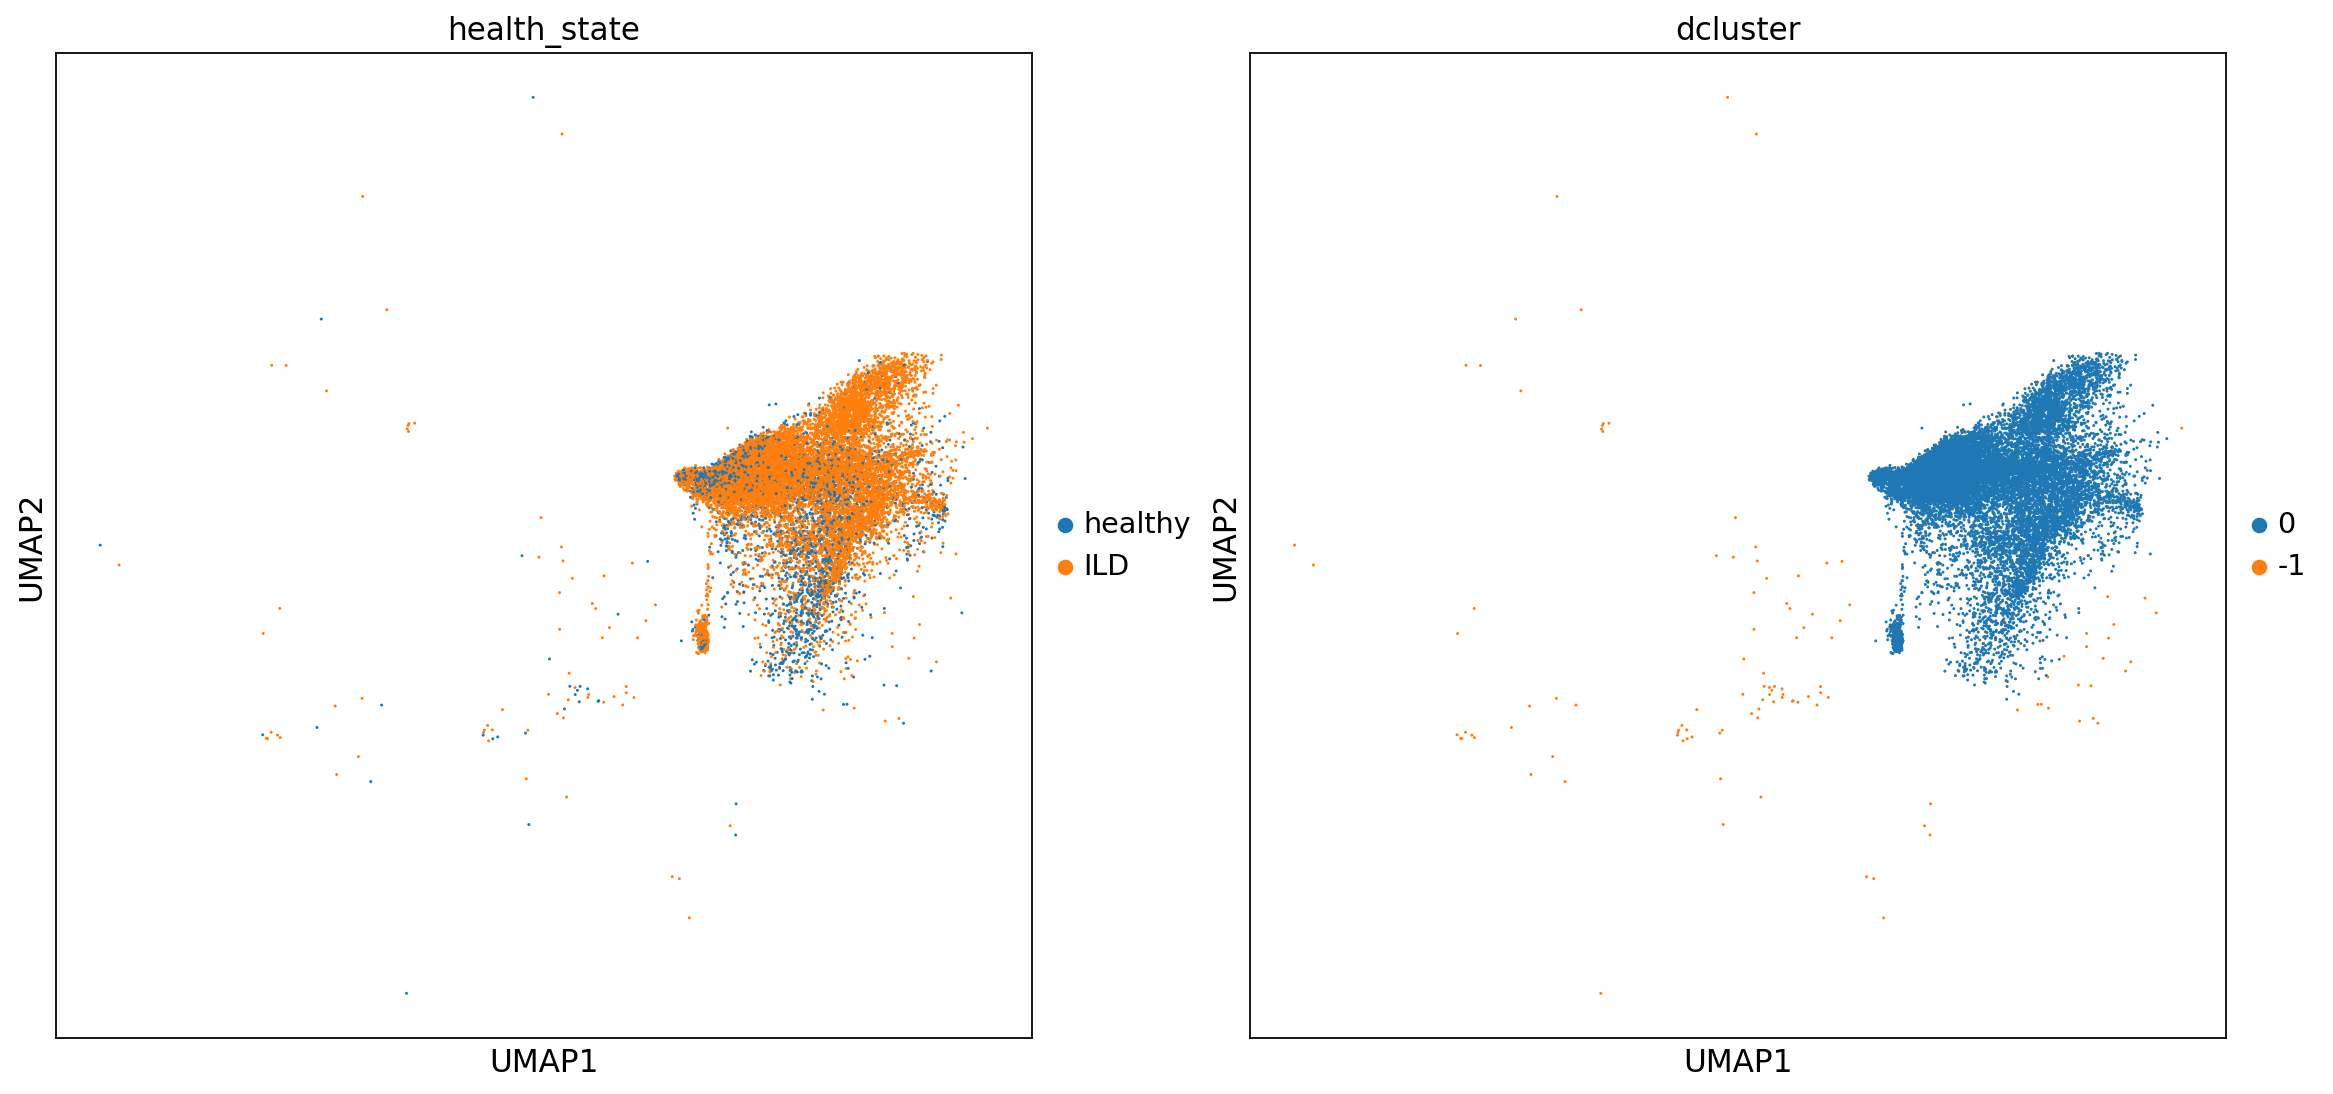

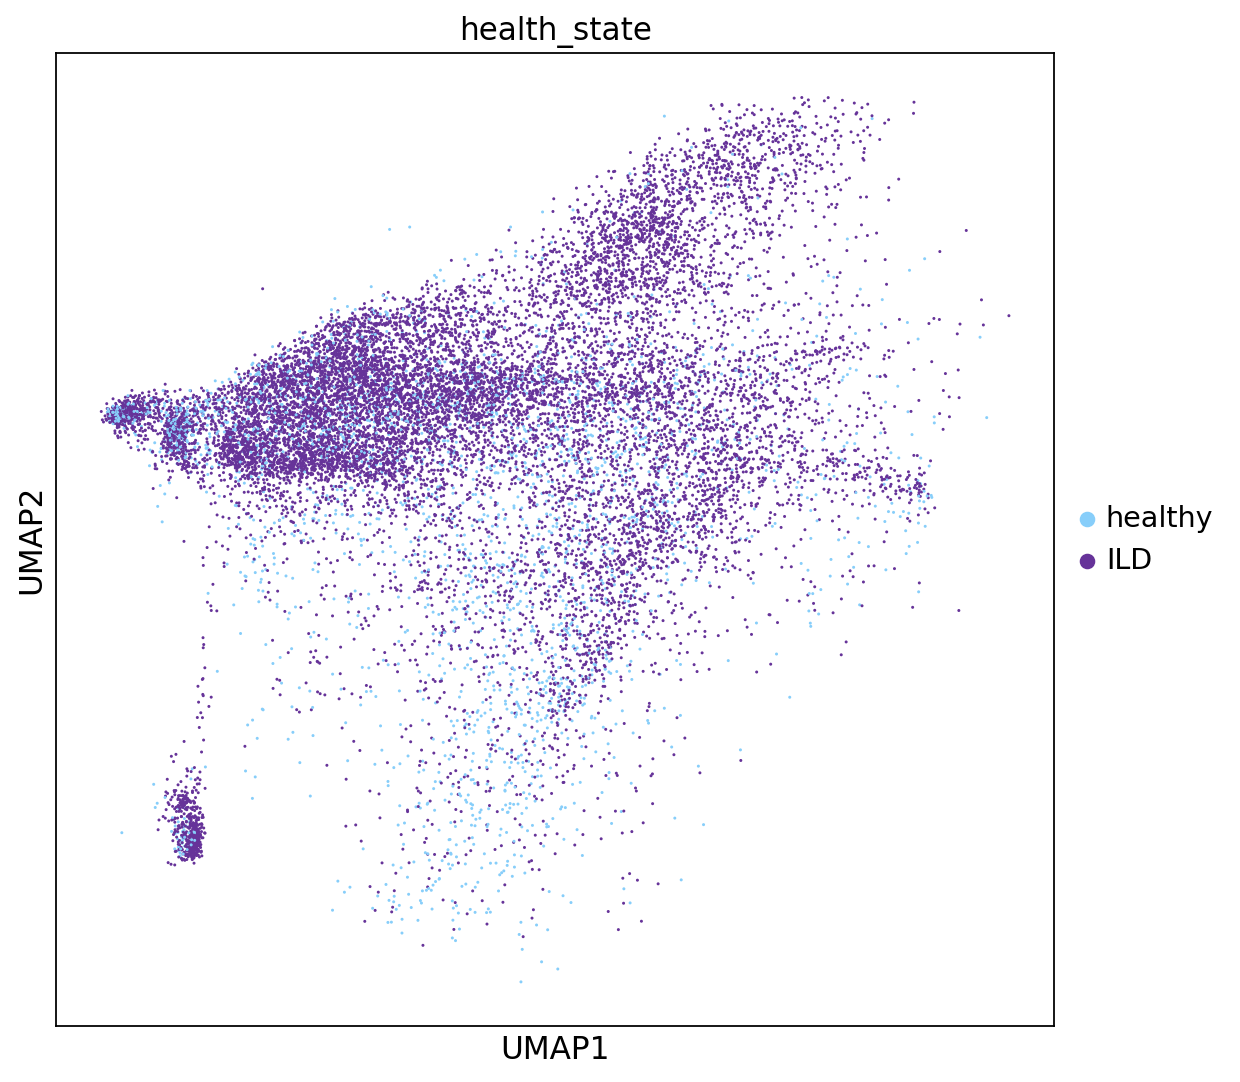

***DGE testing set-up: DC ILD vs. healthy***

N cells (total):
16519

N cells (per condition):
ILD        13735
healthy     2784
Name: health_state, dtype: int64

To Keep: 4955	To Delete: 11564
Started Diffxpy Calculation:	08-02-2022 15:28:18
training location model: True
training scale model: True
iter   0: ll=96259715.133529
caught 1250 linalg singular matrix errors
iter   1: ll=93399386.447554, converged: 0.00% (loc: 20.75%, scale update: False), in 4.01sec
caught 13 linalg singular matrix errors
iter   2: ll=93018248.433096, converged: 0.00% (loc: 21.05%, scale update: False), in 3.20sec
iter   3: ll=92982537.520303, converged: 0.00% (loc: 21.05%, scale update: False), in 2.76sec
iter   4: ll=92981239.202874, converged: 0.00% (loc: 21.05%, scale update: False), in 3.04sec
iter   5: ll=92980795.056475, converged: 0.00% (loc: 21.05%, scale update: False), in 3.12sec
iter   6: ll=41055407.478005, converged: 0.10% (loc: 0.10%, scale update: True), in 56.71sec
caught 1216 linalg singula

iter  82: ll=35863311.067484, converged: 98.23% (loc: 98.23%, scale update: False), in 0.81sec
iter  83: ll=35862928.401854, converged: 98.23% (loc: 98.23%, scale update: False), in 0.82sec
iter  84: ll=35862893.265821, converged: 98.23% (loc: 98.23%, scale update: True), in 4.96sec
iter  85: ll=35862497.342274, converged: 98.23% (loc: 98.23%, scale update: False), in 0.96sec
iter  86: ll=35862103.425102, converged: 98.23% (loc: 98.23%, scale update: False), in 0.81sec
iter  87: ll=35861711.797491, converged: 98.23% (loc: 98.23%, scale update: False), in 0.80sec
iter  88: ll=35861322.205762, converged: 98.23% (loc: 98.23%, scale update: False), in 0.88sec
iter  89: ll=35860934.718502, converged: 98.23% (loc: 98.23%, scale update: False), in 0.83sec
iter  90: ll=35860897.613571, converged: 98.23% (loc: 98.23%, scale update: True), in 4.90sec
iter  91: ll=35860497.568019, converged: 98.23% (loc: 98.23%, scale update: False), in 0.80sec
iter  92: ll=35860099.858477, converged: 98.23% (loc

In [12]:
## iterative DGE testing
for ct in cell_type_names:
    
    ## step 1: define DGE testing set up
    cell_type = ct # cell type of interest
    ct_label = 'cell_type_group'
    condition_label = 'health_state' # meta data variable storing the condition to test
    groups = ['healthy', 'ILD']
    min_cells = 20
    print('\n\nPerforming DGE testing: {} {} vs. {} \n\n'.format(cell_type, groups[1],groups[0]))
    
    ## step 2: filtering take 5% of all cells in cell type per group
    tab = pd.DataFrame(index = adata.var_names)
    tab = sct.calc.add_percentages(adata[adata.obs.loc[:, ct_label] == ct], table = tab, group_by = condition_label,
                    gene_label = "index", ids = groups)
    test_genes = tab[(tab.loc[:, "pct.%ss" %groups[0]] > 0.05) | (tab.loc[:, "pct.%ss" %groups[1]] > 0.05)].index
    
    ## step 3: generate count object for DGE testing
    adata_raw = sct.calc.generate_count_object(adata[:, test_genes], hue = condition_label,
                                               outliers_removal = True, min_samples = 100,
                                               cell_type_label = ct_label, cell_type = [cell_type],
                                               ref = groups[0], min_cells = 5, subset = groups)
    

    print('***DGE testing set-up: {} {} vs. {}***\n'.format(cell_type, groups[1],groups[0]))
    print('N cells (total):\n{}\n'.format(adata_raw.shape[0]))
    print('N cells (per condition):\n{}\n'.format(adata_raw.obs[condition_label].value_counts()))
    
    ## step 4: subsample to 30 percent
    from sklearn.model_selection import StratifiedShuffleSplit
    s = StratifiedShuffleSplit(n_splits = 1, test_size = 0.7, random_state = 42)
    
    for index_keep, index_del in s.split(adata_raw.obs_names, adata_raw.obs.disease_dataset):
        cells = adata_raw.obs_names[index_keep]
        label_keep = adata_raw.obs.health_state[index_keep]
        del_cells = adata_raw.obs_names[index_del]
        print('To Keep: %s\tTo Delete: %s' %(len(cells), len(del_cells)))
    
    adata_raw = adata_raw[cells].copy()
    count = adata_raw.obs.loc[:, condition_label].value_counts()
    
    if (count[0] < min_cells) or (count[1] < min_cells):
        print('Too few cells in one condition (%s)\n%s' %(cell_type, count))
    
    else:
        
        ## step 5: perform DGE testing
        print('Started Diffxpy Calculation:\t%s' %sct.util.timestamp())
    
        de_test = de.test.wald(data = adata_raw.X, formula_loc = '~ 1 + %s + data_set' %condition_label,
                               factor_loc_totest = condition_label,
                               training_strategy = [{'max_steps': 100, 'method_b': 'brent', 'update_b_freq': 5,
                                                     'ftol_b': 1e-8, 'max_iter_b': 80}],
                               gene_names = adata_raw.var_names, sample_description = adata_raw.obs,
                               noise_model = 'nb', size_factors = 'n_counts_scaled')
    
        print("Finished Diffxpy Calculation:\t%s" %sct.util.timestamp())
        
        ## step 4: generate and filter results
        # create unfiltered results table
        print('Writing DGE results table')
        qval_thresh = 0.1
        res = de_test.summary().sort_values(by=['qval'], ascending=True)
        res = res[res.qval < qval_thresh].loc[:, ].copy()
        dge = sct.calc.add_percentages(adata[adata_raw.obs_names], res, ids=groups, group_by=condition_label)
    
        ## add number of patients per condition in which each gene is expressed in > 10%
        tab = pd.DataFrame(index = res.gene)
        tab = sct.calc.add_percentages(adata[adata.obs.loc[:, ct_label] == ct], table = tab, group_by = 'disease_patient',
                            gene_label = 'index', ids = adata.obs.disease_patient.cat.categories.values)
        res['%s_count' %groups[0]] = [sum(tab.filter(like = groups[0]).loc[gene] > 0.1) for gene in tab.index]
        res['%s_count' %groups[1]] = [sum(tab.filter(like = groups[1]).loc[gene] > 0.1) for gene in tab.index]
    
        ## Add number of data sets per condition in which each gene is expressed at all
        tab = pd.DataFrame(index = res.gene)
        tab = sct.calc.add_percentages(adata[adata.obs.loc[:, ct_label] == ct], table = tab, group_by = 'disease_dataset',
                            gene_label = "index", ids = adata.obs.disease_dataset.cat.categories.values)
        res['%s_ds_count' %groups[0]] = [sum(tab.filter(like = groups[0]).loc[gene] > 0) for gene in tab.index]
        res['%s_ds_count' %groups[1]] = [sum(tab.filter(like = groups[1]).loc[gene] > 0) for gene in tab.index]
        
         # sort DGE table by logFC
        res = res.sort_values('log2fc', ascending = False)
        
        ## step 5: save results
        ct_label = ct.split()
        s = '_'
        ct_label = s.join(ct_label)
        ct_label = ct_label.replace('/','_')
        ct_label = str(ct_label)
        csv_dir = results_dir + '210616_CPC_IPF_reference_DGE_IPF_vs_healthy_' + ct_label + '.csv' 
        csv_dir = str(csv_dir)
        res.to_csv(csv_dir, index = False)
        print('Saved DGE results to', csv_dir)